In [30]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import os
import shutil
from tqdm import tqdm
from PIL import Image

In [31]:
%matplotlib inline

### Paths
To use this notebooks correctly adjust the paths below to your corresponding directories:

from `https://www.robots.ox.ac.uk/~vgg/data/fgvc-aircraft/` download the:
- <b>data</b> (includes all training, testing and validation images)
- <b>annotations</b> (annotations for the data)

File structure you need to create must look like: 
```
data
│   
└───FGVC-Aircraft
    │
    └───fgvc-aircraft-2013b
    │   
    └───fgvc-aircraft-2013b-annotations
    
```

In [32]:
global_path = '../../data/FGVC-Aircraft'
dataset_path = global_path+'/fgvc-aircraft-2013b'
annotations_path = global_path+'/fgvc-aircraft-2013b-annotations'

In [33]:
imgs_train_fnames_path = dataset_path+'/data/images_train.txt'
imgs_test_fnames_path = dataset_path+'/data/images_test.txt'
imgs_val_fnames_path = dataset_path+'/data/images_val.txt'

imgs_path = dataset_path+'/data/images'

In [34]:
training_fnames = []
testing_fnames = []
validation_fnames = []

# Loading training image file_names
with open(imgs_train_fnames_path, 'r') as data_file:
    for line in data_file:
        training_fnames.append(line.split('\n')[0])

# Loading testing image file_names        
with open(imgs_test_fnames_path, 'r') as data_file:
    for line in data_file:
        testing_fnames.append(line.split('\n')[0])
    
# Loading validation image file_names        
with open(imgs_val_fnames_path, 'r') as data_file:
    for line in data_file:
        validation_fnames.append(line.split('\n')[0])

In [35]:
print("[Training imgs names]", training_fnames[0], len(training_fnames))
print("[Testing imgs names]", testing_fnames[0], len(testing_fnames))
print("[Validations img names]", validation_fnames[0], len(validation_fnames))

[Training imgs names] 1025794 3334
[Testing imgs names] 1514522 3333
[Validations img names] 0481847 3333


In [36]:
imgs_names = [name[:-4] for name in os.listdir(imgs_path)] # Cuts off the extension '.jpg'
imgs_names[0], len(imgs_names)

('1376762', 10000)

In [37]:
# labels_map = {'train': {}, 'test': {}, 'val': {}}
labels_map = {}
stage_paths = [(annotations_path+'/data/images_manufacturer_train.txt', 'train'),
               (annotations_path+'/data/images_manufacturer_test.txt', 'test'),
               (annotations_path+'/data/images_manufacturer_val.txt', 'val')]

# Loading alle image file_names with their classes
for path, stage in stage_paths:
    with open(path, 'r') as data_file:
        for line in data_file:
            x = line.split('\n')[0]
            fname = x[:7]
            class_ = x[8::]
            labels_map[fname] = class_

labels = np.asarray(list(labels_map.values()))
classes, distribution = np.unique(labels, return_counts=True)

In [38]:
# Create structure for loading into PyTorch Dataset model
folder_name = 'pytorch_structured_dataset'
folder_path = os.path.join(global_path, folder_name)
def mkdir_if_not_exists(dirpath):
    if not os.path.exists(dirpath):
        os.mkdir(dirpath)

mkdir_if_not_exists(folder_path)
for subfolder_name in ['train', 'val']:
    subfolder_path = os.path.join(folder_path, subfolder_name)
    mkdir_if_not_exists(subfolder_path)
    for class_ in classes:
        mkdir_if_not_exists(os.path.join(subfolder_path, class_))

In [39]:
# Copy all training and testing images into pytorch structure
for file_names, stage in [[training_fnames, 'train'], [testing_fnames, 'val']]:
    for file_name in tqdm(file_names):
        file_path = imgs_path+'/'+str(file_name)+'.jpg'
        class_ = labels_map.get(file_name)
        src = imgs_path+'/'+str(file_name)+'.jpg'
        dst = os.path.join(global_path, folder_name, stage, class_, file_name+'.jpg')
        shutil.copyfile(src, dst)

100%|█████████████████████████████████████| 3333/3333 [00:01<00:00, 1835.96it/s]


In [40]:
# training_labels

<BarContainer object of 30 artists>

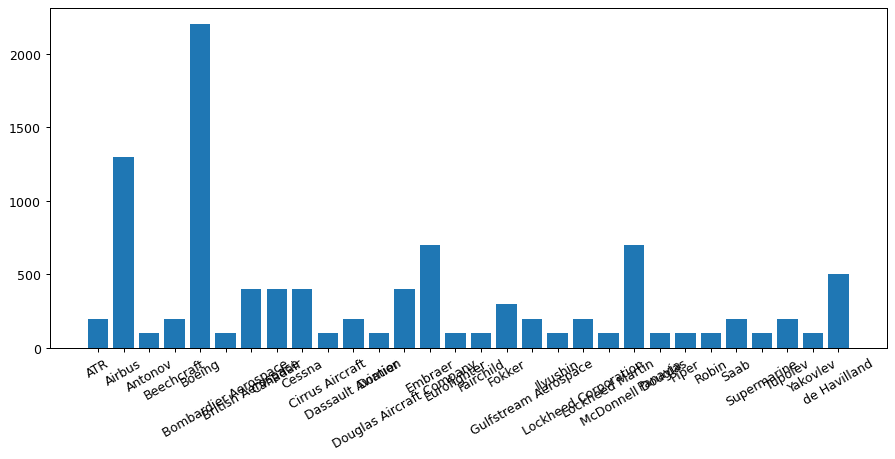

In [62]:
plt.figure(figsize=(12,5), dpi=90)
plt.xticks(rotation=30)

plt.bar(classes, distribution)


In [42]:
classes, distribution

(array(['ATR', 'Airbus', 'Antonov', 'Beechcraft', 'Boeing',
        'Bombardier Aerospace', 'British Aerospace', 'Canadair', 'Cessna',
        'Cirrus Aircraft', 'Dassault Aviation', 'Dornier',
        'Douglas Aircraft Company', 'Embraer', 'Eurofighter', 'Fairchild',
        'Fokker', 'Gulfstream Aerospace', 'Ilyushin',
        'Lockheed Corporation', 'Lockheed Martin', 'McDonnell Douglas',
        'Panavia', 'Piper', 'Robin', 'Saab', 'Supermarine', 'Tupolev',
        'Yakovlev', 'de Havilland'], dtype='<U24'),
 array([ 200, 1300,  100,  200, 2200,  100,  400,  400,  400,  100,  200,
         100,  400,  700,  100,  100,  300,  200,  100,  200,  100,  700,
         100,  100,  100,  200,  100,  200,  100,  500]))